In [1]:
# 3개층의 신경망으로 MNIST 데이터를 학습하는 코드

import numpy
# 시그모이드 함수 expit() 사용을 위해 scipy.specail 불러오기
import scipy.special
# 행렬을 시각화하기 위한 라이브러리
import matplotlib.pyplot
# 시각화가 외부 윈도우가 아닌 현재의 노트북내에서 보이도록 설정
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
    # 신경망 초기화하기
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉, 출력 계층의 개수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 가중치 행렬 wih와 who
        # 배열 내 가중치는 w_i_j로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # 학습률
        self.lr = learningrate
        
        # 활성화 함수로는 시그모이드 함수를 이용
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # 신경망 학습시키기
    def train(self, inputs_list, targets_list):
        # 입력 리스트 2차원의 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신로를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제 값 - 계산 값)
        output_errors = targets - final_outputs
        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # 신경망에 질의하기
    def query(self, inputs_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 변환
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신로를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
        
# 입력, 은닉, 출력 노드의 수
# 픽셀이 28 * 28의 크기이므로 입력 노드의 수는 784
# 100개의 은닉 노드를 선택한 이유에는 관학적 근거가 있는것은 아닙니다.
# 신경망은 입력 값에서 어떤 특징 또는 패턴을 찾아냅니다.
# 이런한 특징 또는 패턴은 입력 값의 수보다는 작은 형태로 표현되므로 일단 은닉 노드의 수는 784보다 크지는 않을것 입니다.
# 즉 입력 값의 수보다 작은 값을 선택함으로써 신경망이 주요 특징을 찾아내는 것입니다.
# 하지만 만약 우리가 너무 적은 수의 은닉 계층 노드를 선택한다면 충분히 더 많은 특징과 패턴을 찾아낼 수도 있는 신경망의 능력을 제한시키는 것입니다.
# 즉 이 경우에는 MNIST 데이터에 대한 이해도를 표현할 능력을 제거하는 셈입니다.
# 출력 계층에서 10개의 레이블을 구분해야 하므로 10개의 출력 노드가 필요하다는 점을 고려하면 은닉 계층에 100개의 노드를 선택한 것은 합리적인 선택으로 보입니다.
# 어떤 문제에 대해 은닉 노드를 몇 개로 해야 할지 결정하는데 대한 완벽한 방법롤은 존재하지 않습니다.
# 더 나아가 은닉 계층을 몇 개로해야 할는지에 대해서도 정답은 없습니다.
# 현재로서 최선의 접근 방법은 우리가 해결해야 하는 문제에서 최적의 설절을 찾을 때까지 실험을 반복함으로써 그것을 찾아내는 것입니다.
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 학습률은 0.3
learning_rate = 0.2

# 신경망의 인스턴스 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습 데이터인 csv 파일을 리스트로 불러오기
# training_data_file = open("data/mnist_dataset/mnist_train_100.csv", "r")
training_data_file = open("data/mnist_dataset/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기

# 주기(epoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epochs = 2

for e in range(epochs):
    # 학습 데이터 모음 내의 모든 레코드 탐색
    for record in training_data_list:
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(",")
        # 입력 값의 범위와 값 조정
        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
        # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.1)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0]은 이 레코드에 대한 결과 값
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

        pass
    pass

In [2]:
# 신경망 테스트 하기

# load the mnist tet data CSV file into a list
test_data_file = open("data/mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [3]:
# get the first test record
all_values = test_data_list[0].split(",")
# print the label
print(all_values[0])

7


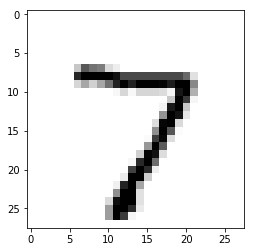

In [4]:
# 픽셀 값들을 이미지로 시각화
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

In [5]:
# 학습된 신경망에 질릐를 해 일련의 숫자를 얻었고 이 숫자들은 각 출력 노드의 결과 값입니다.
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)
# 학습된 신경망에 우리가 질문한 것은 이미지에 적힌 숫자가 무엇이냐는 것 입니다.

array([[0.00918305],
       [0.01439787],
       [0.02551392],
       [0.00135892],
       [0.00610356],
       [0.00776148],
       [0.00731612],
       [0.98214428],
       [0.01975106],
       [0.01198304]])

In [6]:
# 나머지 테스트 데이터 모음에 대한 테스트 

# 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 정답은 첫 번째 값
    correct_label = int(all_values[0])
    print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    # numpy.argmax() 행렬 내에서 가장 큰 값을 찾아 그 위치를 알려주는 함수
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if(label == correct_label):
        # 정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        # 정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne

4 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
2 correct label
3 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
6

6 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
4 correct label
9 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
4 correct label
9 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
5

7 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
5 correct label
3 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
6 correct label
5 network's answer
4 correct label
4 network's answer
2

2 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
4 correct label
9 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
0 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
5 correct label
3 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
7 correct label
1 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
6

0 correct label
0 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
7 correct label
0 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
7 correct label
3 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 ne

5 correct label
3 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
7 correct label
2 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
9 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
3 correct label
3 ne

0 correct label
0 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
1 correct label
1 ne

5 correct label
5 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
2 correct label
3 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
4 correct label
4 ne

6 network's answer
5 correct label
5 network's answer
2 correct label
9 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
8 correct label
3 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
5

7 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
0

5 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
6 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
8 correct label
3 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
9 correct label
1 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
3

7 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
7 correct label
2 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
0

3 correct label
3 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
4 correct label
9 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
9 correct label
1 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
2 correct label
3 ne

7 correct label
7 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
6 correct label
0 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
0 correct label
0 ne

2 correct label
2 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
4 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
7 correct label
8 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
1 correct label
1 ne

5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
3 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
2 correct label
4 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
1 correct label
1 ne

9 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
9 correct label
8 network's answer
3 correct label
3 network's answer
6 correct label
5 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
7

2 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
3 network's answer
3 correct label
3 network's answer
2 correct label
3 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
1

6 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
7 correct label
2 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
2

7 correct label
7 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
0 correct label
0 ne

5 correct label
3 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
8 correct label
6 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
2 correct label
2 ne

5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
4 correct label
4 ne

9 correct label
9 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
8 correct label
3 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
7 correct label
7 ne

1 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
9 correct label
0 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
2

4 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
2 correct label
8 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
3

9 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
2 correct label
8 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
2

8 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
2 correct label
0 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0

3 correct label
3 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
2 correct label
7 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 ne

7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
2 correct label
2 ne

0 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
6

7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
9 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 ne

3 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
7

1 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
4

5 network's answer
6 correct label
6 network's answer
7 correct label
2 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
7 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
7 correct label
2 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
8

0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4

1 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
4 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
3 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8

In [7]:
print(scorecard)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [15]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9535


In [ ]:
# 학습을 여러 번 반복함으로써 신경망의 성능을 개선할 수 있습니다. 한 번의 수행을 주기(epoch)라고 합니다. 
# 이러한 반복 작업은 경사 하강법에 의해 가중치의 값이 업데이트되는 과정에서 더 많은 가능성을 제공해주기 때문입니다.
# 하지만 너무 학습을 많이 하면 신경망이 학습 데이터에 오버피팅(과적합 - overfitting)되어 테스트 데이터에 대한 성능은 오히려 
# 떨어지므로, 지나친 학습은 좋지 않습니다.
# 성능이 확 떨어진 것은 신경망이 경사 하강법의 과정에서 잘못된 최저저머에 빠져버린 것 같습니다.
# 신경망의 학습 과정에는 본질적으로 임의의 요소가 들어가므로 예상치 못한 결과가 종종 발생합니다.
# 다시한번 말하지만 이러한 방식은 과학적인 방식은 아닙니다. 제대로 하기 위해서는 각각의 학습률과 주기의 다양한 조합에 대해
# 여러 번 실험을 함으로써 경사 하강법에 내재되어 있는 임의적 요소의 효과를 최소화해야 합니다.
# 

# 은닉계층은 학습이 일어나는 계층입니다. 입력 노드는 그저 입력 신호를 가져올 뿐이며 출력 노드는 신경망이 제시하는 답을 출력할 뿐입니다.
# 입력 값이 답을 낼 수 있도록 학습하는 부분이 은닉 계층입니다. - 은닉 계층로 연결되는 가중치가 학습됩니다.
# 만약 너무 적은 수의 은닉 노드, 예를 들어 3개의 은닉 노드를 가진다면 학습을 할 공간이 부족해 학습을 진행할 수 없게 됩니다.
# 3개의 좌석을 가지는 자동차에 10명을 태우려고 하는 셈인 것입니다. 컴퓨터 과학자들은 이런한 제한을 학습 용량(learning capacity) 이라고 합니다.
# 우리의 신경망은 학습 용량 이상을 학습할 수 없습니다.
# 만약 10,000 갱의 은닉 노드를 가진다면 어떨까요? 학습 용랴이 부족한 일은 발생하지 않겠지만 학습이 진행되기에 너무 많은 선택지가 있어
# 신경망이 학습하기가 어려워 집니다. 이런 신경망을 학습시키려면 수만 번의 주기를 돌려야 할 것입니다.
# 은닉 노드의 개수가 매우 작을때에는 그 결과가 그다지 좋지 않음을 볼 수 있습니다. 
# 은닉 노드의 수를 늘려감에 따라 결과가 개선되기는 하지만, 급속도로 좋아지지는 않습니다. 
# 은닉 노드가 늘어난다는 것은 직전 계층과 직후 계층에 있는 모든 노드들의 연결에 영향을 줌으로써 수많은 연산이 추가적으로
# 필요하게 된다는 뜻이고 따라서 신경망을 학습시키는 데 소요되는 시간도 크게 늘어나게 됩니다.
# 